# Function Optimization Notebook
This notebook is designed to finding the root of a given function.
Additionally, the local and global maxima and minima can be examined.

This notebook was created and tested using the following packages and versions:

* Python 3.6.1
* IPython 5.3.0
* IPyWidgets 6.0.0
* Jupyter Notebook 5.0.0
* Matplotlib 2.0.2
* NumPy 1.12.1
* SciPy 0.19.0

In [1]:
import numpy as np
import scipy as sp
import scipy.optimize as opt
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import (display, clear_output)
%matplotlib inline

### Function Root Calculation
* Enter the function to optimize here
* The function must have one variable, x

In [2]:
f = lambda x: x**3 - 2 * (x**2) + 10

In [3]:
def root_plot(llim, ulim, f):
    """Plots a function from lower and upper limits.
    The point where f=0 is marked on the plot
    
    Arguments:
        * llim: The lower limit of the plot
        * ulim: The upper limit of the plot
        * f: The function to plot
        
    Returns:
        None
    """
    x = np.linspace(llim, ulim, 1000)
    y = f(x)
    plt.plot(x, y)
    plt.axhline(0, linestyle='--', color='black')
    r = opt.brentq(f, llim, ulim)
    plt.scatter([r], [0], c='r', s=50)
    plt.xlim(llim, ulim)

### Plot of the Root
* The next cell plots the function entered earlier
* The range of the plot is adjustable with the sliders
* The root of the function is marked by a red dot
* The following cell can then be run to get the value of the root

In [4]:
global lower_lim
global upper_lim
lower_lim  = -10
upper_lim = 10
root_plot(lower_lim, upper_lim, f)

rp_frs = widgets.FloatRangeSlider(
    value = [lower_lim, upper_lim],
    min = -50,
    max = 50,
    description='Plot Range:',
    disabled=False,
    orientation='horizontal',
    continuous_update=False)

def rp_frs_on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        global lower_lim
        global upper_lim
        clear_output()
        val = change['new']
        lower_lim, upper_lim = val
        root_plot(lower_lim, upper_lim, f)
        
rp_frs.observe(rp_frs_on_change)
display(rp_frs)

In [5]:
opt.brentq(f, lower_lim, upper_lim)

-1.6542491578567564

### Function Minimum Calculation
* Enter the function to find the minimum here
* The function must have one variable, x
* Enter the lower limits of the plot in lower_lim
* Enter the upper limits of the plot in upper_lim

In [6]:
f = lambda x: 1 - np.sin(x) / x
lower_lim = -15
upper_lim = 15

In [7]:
def min_plot(limits, x0, f, use_tnc):    
    """Plots a function from lower and upper limits.
    The found minimum and inital guess are makred on the plot.
    
    Arguments:
        * limits: Tuple value containing the lower and upper limits
        * x0: Initial guess of the minimum
        * f: The function to plot
        * use_tnc: Boolean for selecting between BFGS and TNC methods
        
    Returns:
        None
    """
    llim, ulim = limits
    x = np.linspace(llim, ulim, 1000)
    y = f(x)    
    if use_tnc:
        xmin = opt.minimize(f, x0, method='TNC').x
    else:
        xmin = opt.minimize(f, x0).x     
    plt.plot(x, y)
    plt.scatter(x0, f(x0), c='g', marker='o', s=50)  
    plt.scatter(xmin, f(xmin), c='r', marker='v', s=50)   
    plt.xlim(llim, ulim)

### Plot of the Minimum
* The next cell plots the function entered earlier
* The initial guess of the minimum is adjustable
* The optimization method is changeble by the toggle button
* By default the Broyden-Fletcher-Goldfrab-Shanno (BFGS) is used, the alternate method is a truncated newton method (TNC)

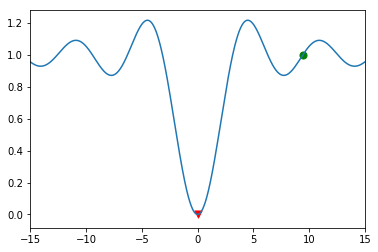

In [8]:
global x0
global use_tnc
x0 = 1
use_tnc = False 
min_plot((lower_lim, upper_lim), 0, f, False)

mp_fs = widgets.FloatSlider(
    value = x0,
    min = lower_lim,
    max = upper_lim,
    description='Initial Guess:',
    orientation='horizontal',
    continuous_update=False)

def mp_fs_on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        global x0
        global use_tnc
        x0 = change['new']       
        clear_output()
        min_plot((lower_lim, upper_lim), x0, f, use_tnc)
        
mp_tb = widgets.ToggleButton(
    value=False,
    description='Use Alternate Method')  

def mp_tb_on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        global x0
        global use_tnc
        use_tnc = change['new']       
        clear_output()
        min_plot((lower_lim, upper_lim), x0, f, use_tnc)
        
mp_fs.observe(mp_fs_on_change)
mp_tb.observe(mp_tb_on_change)
min_controls = widgets.HBox([mp_fs, mp_tb])
display(min_controls)

In [9]:
def linear(x, a, b):
    return a * x + b

def quadratic(x, a, b, c):
    return a * (x**2) + b * x + c
    
def cubic(x, a, b, c, d):
    return a * (x**3) + b * (x**2) + c * x + d

In [10]:
def fit_plot(rand_model, fit_model):
    n = 100
    x = np.linspace(0, 5, n)
    a, b, c, d = np.random.randn(4)
    
    if rand_model == 'linear':
        y_model = linear(x, a, b)
    elif rand_model == 'quadratic':
        y_model = quadratic(x, a, b, c)
    elif rand_model == 'cubic':
        y_model = cubic(x, a, b, c, d)
    else:
        raise ValueError('Invalid random model: ' + rand_model)
        
    y = y_model + a * 2 * np.random.randn(n)
    
    if fit_model == 'linear':
        (a_m, b_m), _ = opt.curve_fit(linear, x, y, (a, b))
        y_fit = linear(x, a_m, b_m)
    elif fit_model == 'quadratic':
        (a_m, b_m, c_m), _ = opt.curve_fit(quadratic, x, y, (a, b, c))
        y_fit = quadratic(x, a_m, b_m, c_m)
    elif fit_model == 'cubic':
        (a_m, b_m, c_m, d_m), _ = opt.curve_fit(cubic, x, y, (a, b, c, d))
        y_fit = cubic(x, a_m, b_m, c_m, d_m)
    else:
        raise ValueError('Invalid random model: ' + fit_model)
        
    plt.plot(x, y, 'o')
    plt.plot(x, y_fit, '--r')

### Function fitting
* The next cell tries to fit a function to random data using nonlinear least squares
* The random data is generated from a function with noise added
* The functions supported are Linear, Quadractic, and Cubic

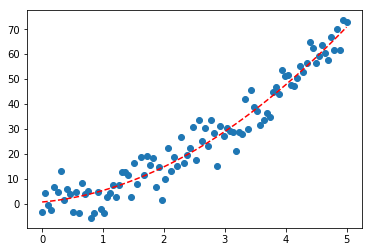

In [11]:
global rand_model
global fit_model
rand_model = 'linear'
fit_model = 'linear'
fit_plot('linear', 'linear')

rm_dd = widgets.Dropdown(
    options={'Linear': 'linear', 'Quadratic': 'quadratic', 'Cubic': 'cubic'},
    value='linear',
    description='Random Data')

def rm_dd_on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        global rand_model
        global fit_model
        clear_output()
        rand_model = change['new']
        fit_plot(rand_model, fit_model)

fm_dd = widgets.Dropdown(
    options={'Linear': 'linear', 'Quadratic': 'quadratic', 'Cubic': 'cubic'},
    value='linear',
    description='Fit Model')

def fm_dd_on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        global rand_model
        global fit_model
        clear_output()
        fit_model = change['new']
        fit_plot(rand_model, fit_model)

rm_dd.observe(rm_dd_on_change)
fm_dd.observe(fm_dd_on_change)
fit_controls = widgets.HBox([rm_dd, fm_dd])
display(fit_controls)